# Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using Python.
1.	Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of
    the suitable techniques to deal with them.
2.	Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3.	Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the 
    following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a 
    linear one, or to decrease the skewness and convert the distribution into a normal distribution.

    Reason and document your approach properly.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab


# Initial Processing

In [2]:
# https://www.kaggle.com/spscientist/students-performance-in-exams

df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,NaN,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,NaN,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,NaN


In [3]:
pd.isna(df)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,True


In [4]:
df.describe()

,math score,reading score,writing score
count,973.000000,983.000000,978.000000
mean,66.330935,69.126144,71.677914
std,15.154602,14.578894,21.738691
min,8.000000,17.000000,15.000000
25%,57.000000,59.000000,60.000000
50%,66.000000,70.000000,71.000000
75%,77.000000,79.000000,80.000000
max,171.000000,120.000000,261.000000


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   973 non-null    float64
 6   reading score                983 non-null    float64
 7   writing score                978 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


# Task1: Handling Null Values

In [254]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     27
reading score                  17
writing score                  22
dtype: int64

In [255]:
mean_value = int(df['math score'].mean())
df['math score'].fillna(value=mean_value, inplace=True)

In [256]:
mean_value = int(df['reading score'].mean())
df['reading score'].fillna(value=mean_value, inplace=True)

In [257]:
mean_value = int(df['writing score'].mean())
df['writing score'].fillna(value=mean_value, inplace=True)

In [258]:
df2 = df
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,66.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,69.0,71.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,66.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,71.0


In [259]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Task2: Outlier Detection

In [260]:
# 1. IQR(Inter Quartile Range)

# Detection

Q1 = np.percentile(df['math score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['math score'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape) 
# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR
print("Upper bound : ", upper)
print("Lower bound : ", lower)

# Removing the Outliers
df = df[(df['math score']>=lower) & (df['math score']<=upper)]

print("New Shape: ", df.shape)

Old Shape:  (1000, 8)
Upper bound :  104.5
Lower bound :  28.5
New Shape:  (991, 8)


In [261]:
# Detection

Q1 = np.percentile(df['reading score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df['reading score'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df.shape) 
# Upper bound
upper = Q3+1.5*IQR
# Lower bound
lower = Q1-1.5*IQR
print("Upper bound : ", upper)
print("Lower bound : ", lower)

# Removing the Outliers
df = df[(df['reading score']>=lower) & (df['reading score']<=upper)]

print("New Shape: ", df.shape)

Old Shape:  (991, 8)
Upper bound :  107.5
Lower bound :  31.5
New Shape:  (983, 8)


<AxesSubplot:xlabel='writing score'>

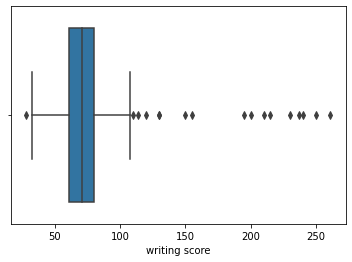

In [262]:
# 2. Visulization

sns.boxplot(x = df['writing score'])

In [263]:
# values below 30 are acting as the outliers.
print("Old Shape: ", df.shape) 
df = df[(df['writing score'] <= 100) & (df['writing score'] >= 30)]
print("New Shape: ", df.shape)


Old Shape:  (983, 8)
New Shape:  (965, 8)


<AxesSubplot:xlabel='writing score'>

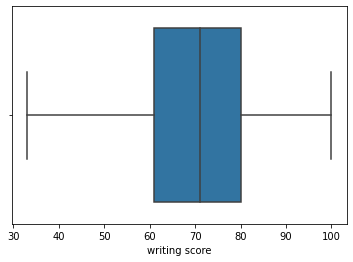

In [264]:
sns.boxplot(x = df['writing score'])

# Task3: Data Transformation

In [265]:
print('math score skewness : ', df2['math score'].skew())
print('reading score skewness : ', df2['reading score'].skew())
print('writing score skewness : ', df2['writing score'].skew())

math score skewness :  0.15120843580823043
reading score skewness :  -0.25085288088873925
writing score skewness :  3.5490766465651844


<AxesSubplot:xlabel='math score', ylabel='Density'>

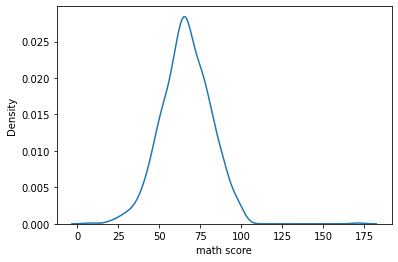

In [266]:
# kde plot
sns.kdeplot(df2['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

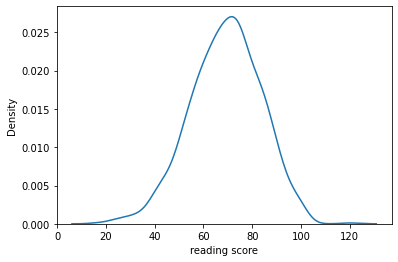

In [267]:
sns.kdeplot(df2['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

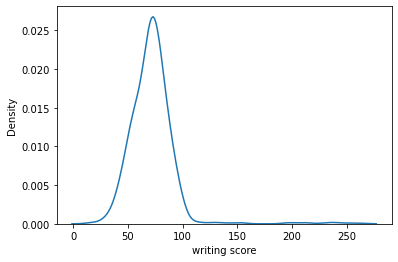

In [268]:
sns.kdeplot(df2['writing score'])

In [269]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

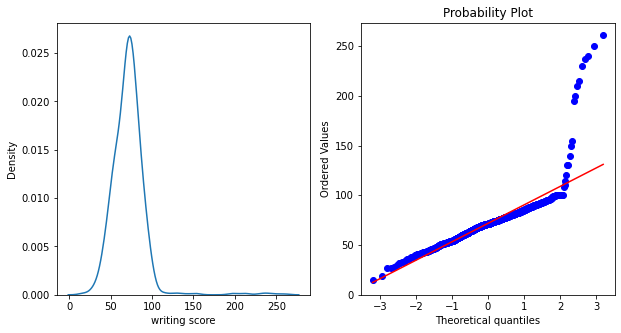

In [270]:
normality(df2, 'writing score')

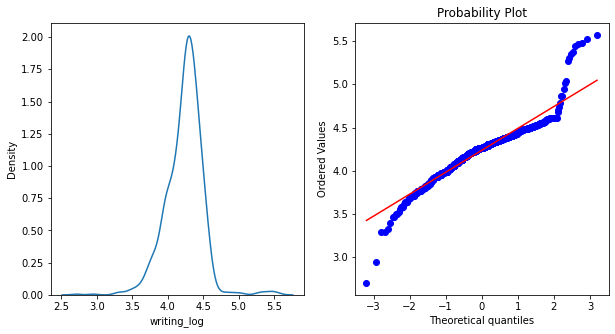

In [271]:
# Logarithmic Transformation
df2['writing_log'] = np.log(df2['writing score'])
normality(df2, 'writing_log')

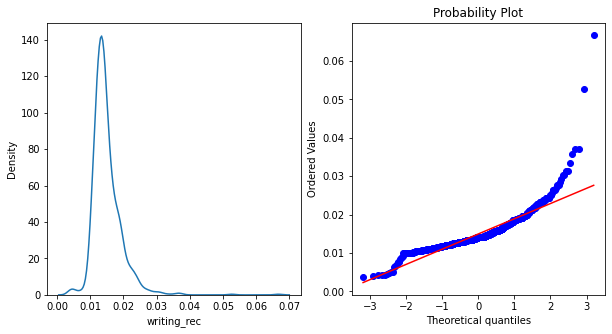

In [272]:
# Reciprocol Transformation
df2['writing_rec'] = 1/df2['writing score']
normality(df2, 'writing_rec')

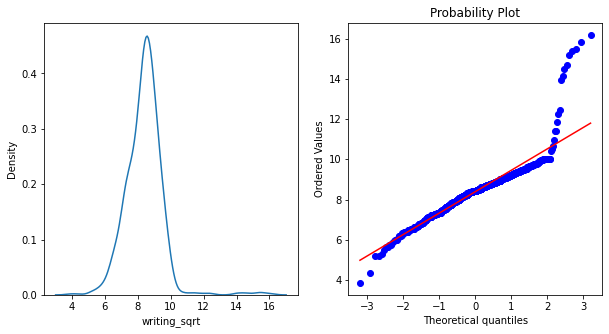

In [273]:
# Square Root Transformation
df2['writing_sqrt'] = np.sqrt(df2['writing score'])
normality(df2, 'writing_sqrt')

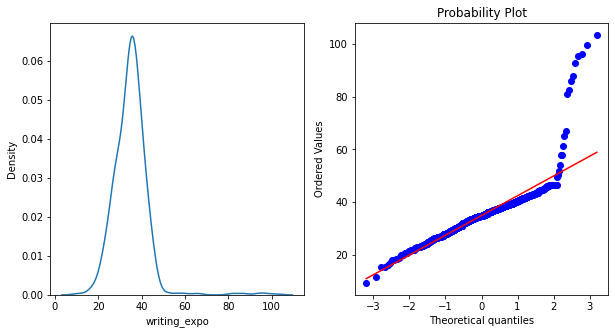

In [275]:
# Exponential Transformation
df2['writing_expo']= df2['writing score']**(1/1.2)
normality(df2, 'writing_expo')